In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Brix Sans'
from nltk import corpus
import numpy as np
import pandas as pd
from wordcloud import WordCloud
%config InlineBackend.figure_format = 'retina'

# Enrollment

In [2]:
df = pd.DataFrame({
    'DSC': '131 275 389 517 494 468 609 592 637'.split(),
    'CSE': '1713 1595 1544 1852 1763 1721 1932 1806 1716'.split(),
    'MATH': '2287 2263 2157 2216 2125 1939 1926 1813 1733'.split(),
    'COGS': '1590 1682 1695 1909 1956 1978 2075 2081 2082'.split(),
}, index='FA17 WI18 SP18 FA18 WI19 SP19 FA19 WI20 SP20'.split(), dtype=int)

/Users/Lee/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


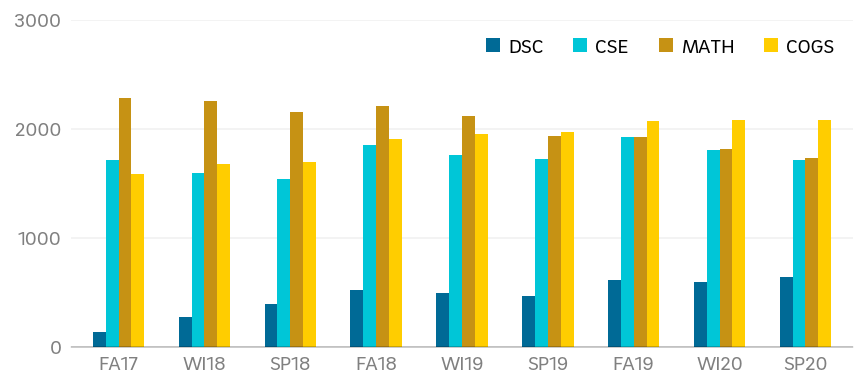

In [3]:
fig, ax = plt.subplots(figsize=(7, 3))
df.plot.bar(ax=ax, width=.6, color=['#006A96', '#00C6D7', '#C69214', '#FFCD00'])
ax.grid(axis='y', lw=.15)
ax.legend(loc='upper right', ncol=4, frameon=False, handlelength=.7, handletextpad=.4, columnspacing=1.5)
ax.set(axisbelow=True, yticks=[0, 1000, 2000, 3000])
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.2)
ax.tick_params(rotation=0, length=0, pad=5, colors='gray')
fig.savefig('enrollment', dpi=500)

# Word Cloud

In [4]:
with open('courses.txt') as file:
    text = file.read().replace('\n', ' ').lower()

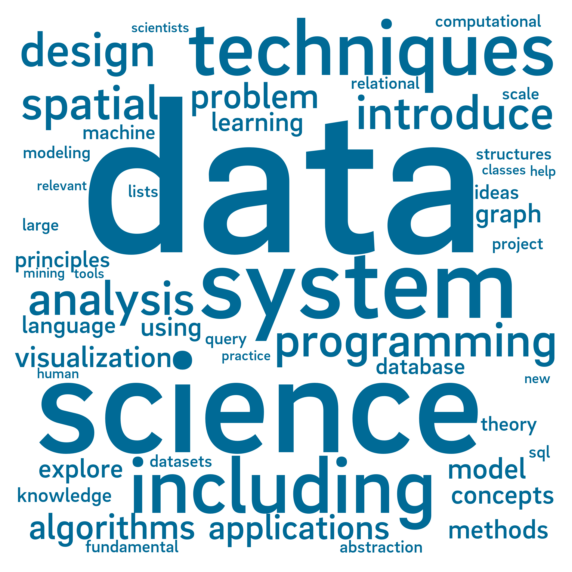

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
wc = WordCloud(
    height=2000,
    width=2000,
    background_color='white',
    color_func=lambda *args, **kwargs: '#006A96',
    collocations=False,
    font_path='Brix Sans Medium.otf',
    max_words=50,
    prefer_horizontal=1,
    random_state=6,
    stopwords=set(corpus.stopwords.words('english')) | set('course cover dsc format include introduced students topics well'.split())
).generate(text)
ax.imshow(wc, interpolation='bilinear')
ax.axis('off')
wc.to_file('wordcloud.png');